In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [140]:
loss = pd.read_csv('checkpoints/vae_12_19_2/loss.csv', delimiter=',')

In [141]:
loss.tail()

,epoch,iters,mse,kl,cycle,total,iter_time,iter_data_time
972,1,1350,-436.729042,27.493748,0.074826,-409.235291,7.367368,0.120117
973,1,1360,-363.378473,26.559970,0.095472,-336.818505,7.252674,0.142148
974,1,1370,-409.314264,25.628164,0.059386,-383.686098,7.922408,0.139427
975,1,1380,-409.361180,26.241366,0.174305,-383.119814,6.261079,0.114627
976,1,1390,-416.599936,26.719832,0.084340,-389.880107,6.158487,0.113422


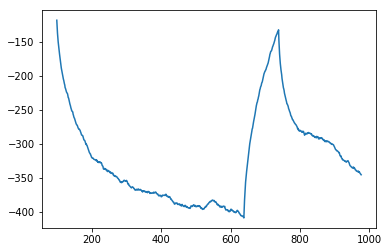

In [142]:
loss['total'].tail(5000).rolling(window=100).mean().plot()

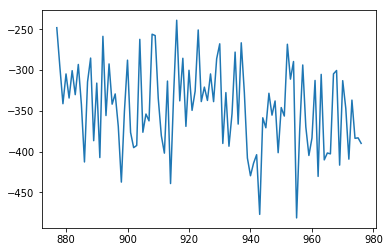

In [143]:
loss['total'].tail(100).plot()

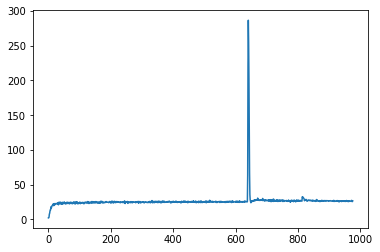

In [144]:
loss['kl'].plot()